In [ ]:
#1. Annual Crime Trends: Compute the total number of victims per year and analyze any patterns or fluctuations in crime rates over the years. 

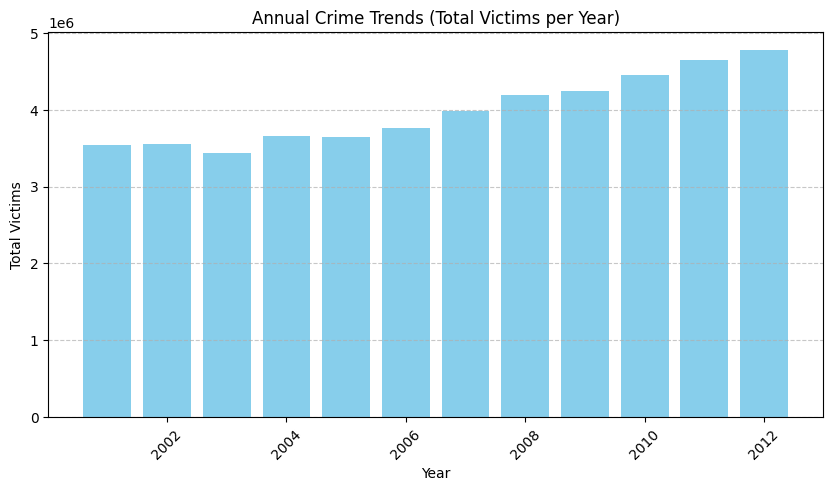

    YEAR  TOTAL IPC CRIMES
0   2001           3538616
1   2002           3560660
2   2003           3432240
3   2004           3664020
4   2005           3645204
5   2006           3756586
6   2007           3979346
7   2008           4186758
8   2009           4242690
9   2010           4449662
10  2011           4651150
11  2012           4774376


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Downloads/project/01_District_wise_crimes_committed_IPC_2001_2012.csv"  # Update with the correct path if needed
df = pd.read_csv(file_path)

# Group by year and sum the total victims
annual_crime_trends = df.groupby("YEAR")["TOTAL IPC CRIMES"].sum()

# Convert to DataFrame for visualization
crime_trends_df = annual_crime_trends.reset_index()

# Plot bar graph
plt.figure(figsize=(10, 5))
plt.bar(crime_trends_df["YEAR"], crime_trends_df["TOTAL IPC CRIMES"], color='skyblue')
plt.xlabel("Year")
plt.ylabel("Total Victims")
plt.title("Annual Crime Trends (Total Victims per Year)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Display computed values
print(crime_trends_df)

In [ ]:
#1 using sql approach

In [2]:
import pandas as pd
import sqlite3

# Load CSV into Pandas
df = pd.read_csv("Downloads/project/01_District_wise_crimes_committed_IPC_2001_2012.csv")

# Create a connection to SQLite (in-memory database)
conn = sqlite3.connect(":memory:")

# Save DataFrame to SQL database
df.to_sql("crime_data", conn, index=False, if_exists="replace")

# Run SQL Query
query = """
SELECT YEAR, SUM("TOTAL IPC CRIMES") AS total_victims
FROM crime_data
GROUP BY YEAR
ORDER BY YEAR;
"""

# Execute query and display result
crime_trends_df = pd.read_sql(query, conn)
print(crime_trends_df)

# Close connection
conn.close()


    YEAR  total_victims
0   2001        3538616
1   2002        3560660
2   2003        3432240
3   2004        3664020
4   2005        3645204
5   2006        3756586
6   2007        3979346
7   2008        4186758
8   2009        4242690
9   2010        4449662
10  2011        4651150
11  2012        4774376


In [ ]:
#2 State-Wise Crime Analysis (2001-2012): Perform a comprehensive analysis of various crimes recorded in each state over the given period. Identify trends, anomalies, and patterns.

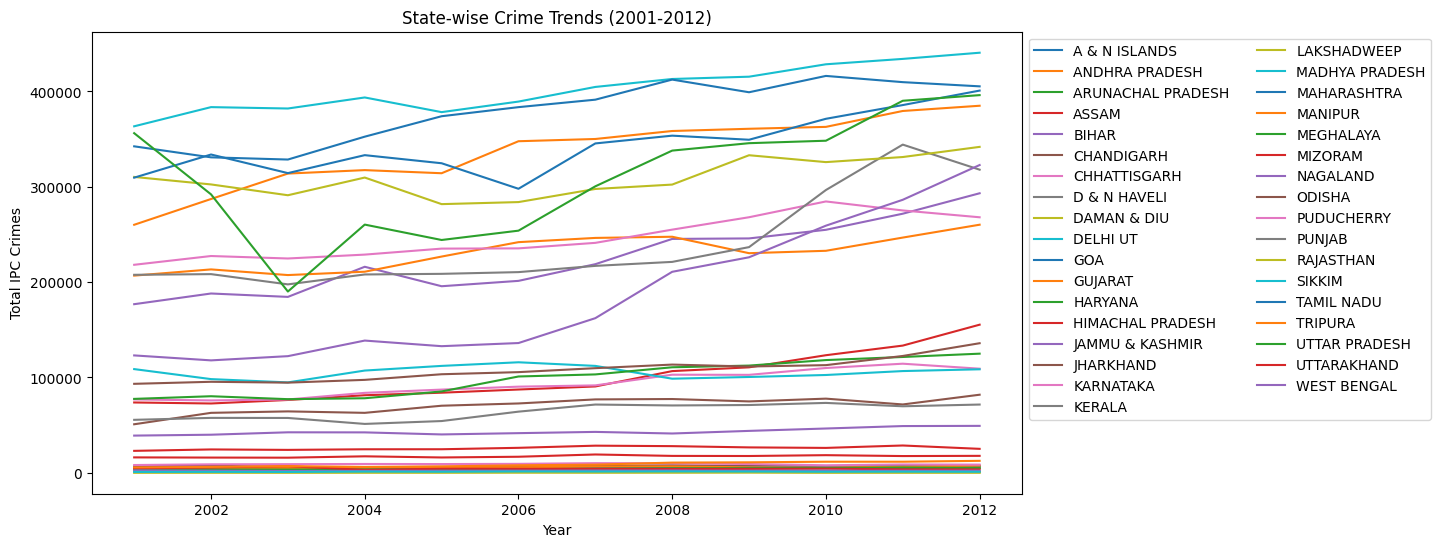

Anomalies (More than 20% change in crimes):
           STATE/UT  YEAR  Crime Change %
62      CHANDIGARH  2003      -26.274304
87    D & N HAVELI  2004       21.005917
99     DAMAN & DIU  2004      -26.394052
100    DAMAN & DIU  2005       22.727273
105    DAMAN & DIU  2010      -26.449275
181      JHARKHAND  2002       23.546980
213         KERALA  2010       25.297164
217    LAKSHADWEEP  2002       47.222222
218    LAKSHADWEEP  2003      -41.509434
219    LAKSHADWEEP  2004      125.806452
220    LAKSHADWEEP  2005      -40.000000
221    LAKSHADWEEP  2006       90.476190
222    LAKSHADWEEP  2007      -30.000000
223    LAKSHADWEEP  2008       69.642857
224    LAKSHADWEEP  2009       41.052632
225    LAKSHADWEEP  2010      -68.656716
227    LAKSHADWEEP  2012       36.363636
277        MIZORAM  2002       25.556545
278        MIZORAM  2003       22.553191
279        MIZORAM  2004      -56.163194
280        MIZORAM  2005       42.310231
351         SIKKIM  2004       42.437923
353         

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "Downloads/project/01_District_wise_crimes_committed_IPC_2001_2012.csv"
df = pd.read_csv(file_path)

# Aggregate crime data at the state level
df_state = df.groupby(["STATE/UT", "YEAR"]).sum().reset_index()

# Identify trends using line charts
plt.figure(figsize=(12, 6))
for state in df_state["STATE/UT"].unique():
    state_data = df_state[df_state["STATE/UT"] == state]
    plt.plot(state_data["YEAR"], state_data["TOTAL IPC CRIMES"], label=state)

plt.xlabel("Year")
plt.ylabel("Total IPC Crimes")
plt.title("State-wise Crime Trends (2001-2012)")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=2)
plt.show()

# Detect anomalies: Compute year-on-year change
df_state["Crime Change %"] = df_state.groupby("STATE/UT")["TOTAL IPC CRIMES"].pct_change() * 100
anomalies = df_state[(df_state["Crime Change %"].abs() > 20)]
print("Anomalies (More than 20% change in crimes):\n", anomalies[["STATE/UT", "YEAR", "Crime Change %"]])

# Identify highest and lowest crime states
avg_crime_per_state = df_state.groupby("STATE/UT")["TOTAL IPC CRIMES"].mean().sort_values(ascending=False)
print("Highest crime-prone states:\n", avg_crime_per_state.head(5))
print("Lowest crime-prone states:\n", avg_crime_per_state.tail(5))

In [ ]:
#2 using sql approach

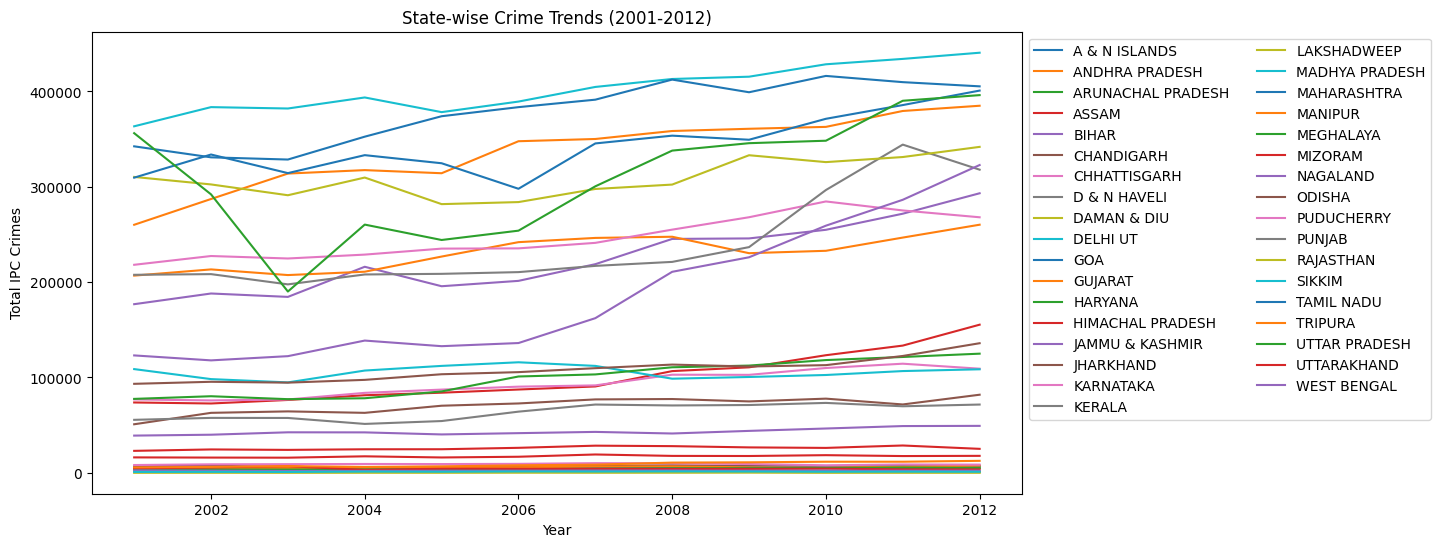

Anomalies (More than 20% change in crimes):
           STATE/UT  YEAR  Crime Change %
62      CHANDIGARH  2003      -26.274304
87    D & N HAVELI  2004       21.005917
99     DAMAN & DIU  2004      -26.394052
100    DAMAN & DIU  2005       22.727273
105    DAMAN & DIU  2010      -26.449275
181      JHARKHAND  2002       23.546980
213         KERALA  2010       25.297164
217    LAKSHADWEEP  2002       47.222222
218    LAKSHADWEEP  2003      -41.509434
219    LAKSHADWEEP  2004      125.806452
220    LAKSHADWEEP  2005      -40.000000
221    LAKSHADWEEP  2006       90.476190
222    LAKSHADWEEP  2007      -30.000000
223    LAKSHADWEEP  2008       69.642857
224    LAKSHADWEEP  2009       41.052632
225    LAKSHADWEEP  2010      -68.656716
227    LAKSHADWEEP  2012       36.363636
277        MIZORAM  2002       25.556545
278        MIZORAM  2003       22.553191
279        MIZORAM  2004      -56.163194
280        MIZORAM  2005       42.310231
351         SIKKIM  2004       42.437923
353         

In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "Downloads/project/01_District_wise_crimes_committed_IPC_2001_2012.csv"
df = pd.read_csv(file_path)

# Create SQLite database and load data
conn = sqlite3.connect(":memory:")
df.to_sql("crime_data", conn, if_exists="replace", index=False)

# Aggregate crime data at the state level
query = """
    SELECT "STATE/UT", YEAR, SUM("TOTAL IPC CRIMES") AS total_crimes
    FROM crime_data
    GROUP BY "STATE/UT", YEAR
"""
df_state = pd.read_sql(query, conn)

# Identify trends using line charts
plt.figure(figsize=(12, 6))
for state in df_state["STATE/UT"].unique():
    state_data = df_state[df_state["STATE/UT"] == state]
    plt.plot(state_data["YEAR"], state_data["total_crimes"], label=state)

plt.xlabel("Year")
plt.ylabel("Total IPC Crimes")
plt.title("State-wise Crime Trends (2001-2012)")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=2)
plt.show()

# Detect anomalies: Compute year-on-year change
df_state["Crime Change %"] = df_state.groupby("STATE/UT")["total_crimes"].pct_change() * 100
anomalies = df_state[(df_state["Crime Change %"].abs() > 20)]
print("Anomalies (More than 20% change in crimes):\n", anomalies[["STATE/UT", "YEAR", "Crime Change %"]])

# Identify highest and lowest crime states
query = """
    SELECT "STATE/UT", AVG("TOTAL IPC CRIMES") AS avg_crime
    FROM crime_data
    GROUP BY "STATE/UT"
    ORDER BY avg_crime DESC
"""
avg_crime_per_state = pd.read_sql(query, conn)
print("Highest crime-prone states:\n", avg_crime_per_state.head(5))
print("Lowest crime-prone states:\n", avg_crime_per_state.tail(5))

# Close the database connection
conn.close()


In [ ]:
#3 City-Wise Crime Distribution: For each state, identify the top six cities with the highest recorded crime incidents. 

In [7]:
import pandas as pd

# Load dataset
file_path = "Downloads/project/02_District_wise_crimes_committed_against_SC_2001_2012.csv"
df = pd.read_csv(file_path)

# Aggregate total crimes for each city (district)
df["total_crimes"] = df[
    ["Murder", "Rape", "Kidnapping and Abduction", "Dacoity", "Robbery", "Arson", 
     "Hurt", "Prevention of atrocities (POA) Act", "Protection of Civil Rights (PCR) Act", 
     "Other Crimes Against SCs"]
].sum(axis=1)

df_city_crime = df.groupby(["STATE/UT", "DISTRICT"])["total_crimes"].sum().reset_index()

# Identify top six crime-prone cities overall
top_cities = df_city_crime.nlargest(6, "total_crimes")
print("Top 6 crime-prone cities overall:\n", top_cities)

Top 6 crime-prone cities overall:
            STATE/UT DISTRICT  total_crimes
820   UTTAR PRADESH    TOTAL         76473
684       RAJASTHAN    TOTAL         55002
466  MADHYA PRADESH    TOTAL         49810
32   ANDHRA PRADESH    TOTAL         43419
138           BIHAR    TOTAL         33341
382       KARNATAKA    TOTAL         24406


In [ ]:
#3 using sql approach

In [1]:
import pandas as pd
import sqlite3

# Load dataset
file_path = "Downloads/project/02_District_wise_crimes_committed_against_SC_2001_2012.csv"
df = pd.read_csv(file_path)

# Create SQLite database and load data
conn = sqlite3.connect(":memory:")
df.to_sql("crime_data", conn, if_exists="replace", index=False)

# SQL query to get the top 6 crime-prone cities overall
query = """
    SELECT "STATE/UT", DISTRICT, 
           SUM("Murder" + "Rape" + "Kidnapping and Abduction" + "Dacoity" + 
               "Robbery" + "Arson" + "Hurt" + "Prevention of atrocities (POA) Act" + 
               "Protection of Civil Rights (PCR) Act" + "Other Crimes Against SCs") AS total_crimes
    FROM crime_data
    GROUP BY "STATE/UT", DISTRICT
    ORDER BY total_crimes DESC
    LIMIT 6;
"""

top_cities = pd.read_sql(query, conn)
print("Top 6 crime-prone cities overall:\n", top_cities)

# Close the database connection
conn.close()


Top 6 crime-prone cities overall:
          STATE/UT DISTRICT  total_crimes
0   UTTAR PRADESH    TOTAL         76473
1       RAJASTHAN    TOTAL         55002
2  MADHYA PRADESH    TOTAL         49810
3  ANDHRA PRADESH    TOTAL         43419
4           BIHAR    TOTAL         33341
5       KARNATAKA    TOTAL         24406


In [ ]:
#4 Highest Crime Rate States: Determine the top five states with the highest crime rates across all crime categories. 

Top 5 states with highest crime rates:
           STATE/UT  TOTAL IPC CRIMES
19  MADHYA PRADESH           4827540
20     MAHARASHTRA           4546872
30      TAMIL NADU           4120352
1   ANDHRA PRADESH           4037962
32   UTTAR PRADESH           3716148


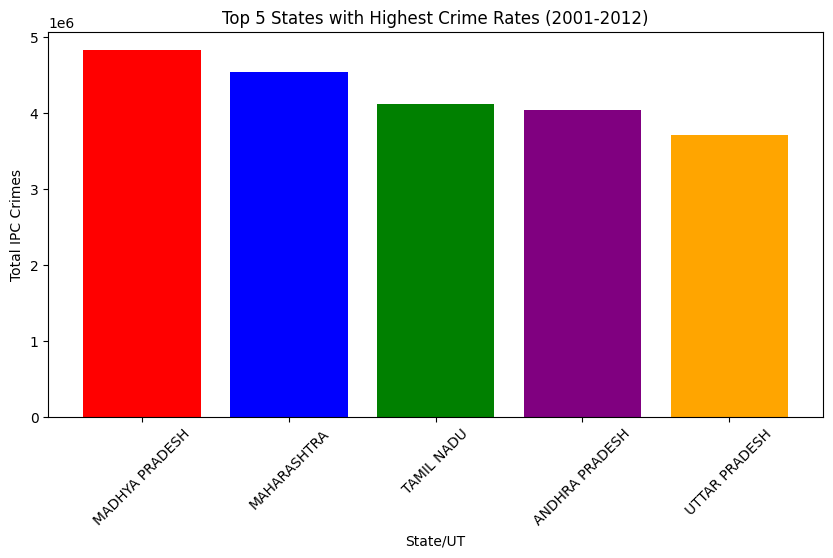

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "Downloads/project/01_District_wise_crimes_committed_IPC_2001_2012 (1).csv"
df = pd.read_csv(file_path)

# Aggregate total crimes per state using pandas queries
state_crime_totals = df.groupby("STATE/UT")["TOTAL IPC CRIMES"].sum().reset_index()

# Get the top 5 states with the highest crime rates
top_5_states = state_crime_totals.nlargest(5, "TOTAL IPC CRIMES")

# Display results
print("Top 5 states with highest crime rates:\n", top_5_states)

# Visualization
plt.figure(figsize=(10, 5))
plt.bar(top_5_states["STATE/UT"], top_5_states["TOTAL IPC CRIMES"], color=['red', 'blue', 'green', 'purple', 'orange'])
plt.xlabel("State/UT")
plt.ylabel("Total IPC Crimes")
plt.title("Top 5 States with Highest Crime Rates (2001-2012)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#4 using sql approach

Top 5 states with highest crime rates:
          STATE/UT  total_crimes
0  MADHYA PRADESH       4827540
1     MAHARASHTRA       4546872
2      TAMIL NADU       4120352
3  ANDHRA PRADESH       4037962
4   UTTAR PRADESH       3716148


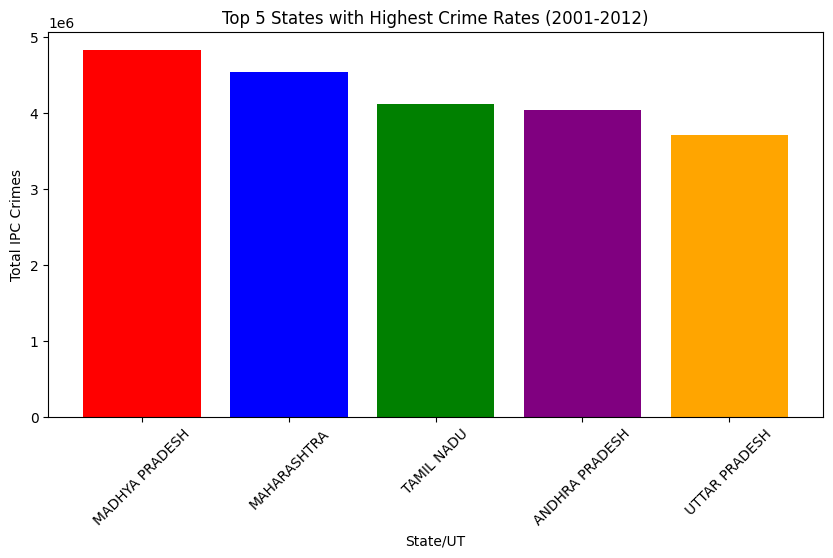

In [4]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Load dataset
file_path = "Downloads/project/01_District_wise_crimes_committed_IPC_2001_2012 (1).csv"
df = pd.read_csv(file_path)

# Create an SQLite database in memory
conn = sqlite3.connect(":memory:")
df.to_sql("crime_data", conn, if_exists="replace", index=False)

# SQL Query to aggregate total crimes per state
query = """
    SELECT "STATE/UT", SUM("TOTAL IPC CRIMES") as total_crimes
    FROM crime_data
    GROUP BY "STATE/UT"
    ORDER BY total_crimes DESC
    LIMIT 5;
"""

# Execute query and store result in a pandas DataFrame
top_5_states = pd.read_sql(query, conn)

# Display results
print("Top 5 states with highest crime rates:\n", top_5_states)

# Visualization
plt.figure(figsize=(10, 5))
plt.bar(top_5_states["STATE/UT"], top_5_states["total_crimes"], color=['red', 'blue', 'green', 'purple', 'orange'])
plt.xlabel("State/UT")
plt.ylabel("Total IPC Crimes")
plt.title("Top 5 States with Highest Crime Rates (2001-2012)")
plt.xticks(rotation=45)
plt.show()

# Close the connection
conn.close()


In [ ]:
#5 Crimes Against Women: Identify the top five cities with the highest number of crimes committed against women. 

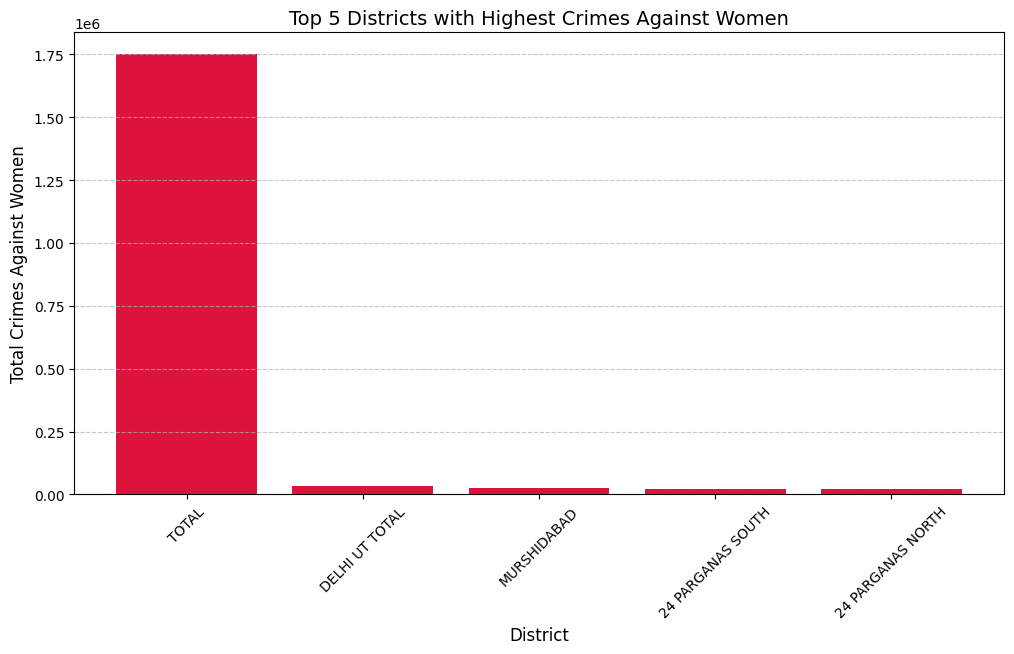

            DISTRICT  TOTAL_CRIMES
0              TOTAL       1750311
1     DELHI UT TOTAL         32438
2        MURSHIDABAD         24485
3  24 PARGANAS SOUTH         22992
4  24 PARGANAS NORTH         21978


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Load the dataset
file_path = "Downloads/project/01_District_wise_crimes_committed_IPC_2001_2012.csv"
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print("Error: File not found. Please ensure the file is uploaded correctly.")
    exit()

# Selecting relevant columns related to crimes against women
crime_columns = [
    "DISTRICT", "RAPE", "DOWRY DEATHS", "ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY", 
    "INSULT TO MODESTY OF WOMEN", "CRUELTY BY HUSBAND OR HIS RELATIVES"
]

# Checking if all columns exist in the dataset
missing_columns = [col for col in crime_columns if col not in df.columns]
if missing_columns:
    print(f"Error: Missing columns in the dataset: {missing_columns}")
    exit()

# Create SQLite database in memory
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

# Save dataframe to SQL table
df[crime_columns].to_sql("crime_data", conn, if_exists="replace", index=False)

# SQL query to compute total crimes per district and get top 5
query = """
    SELECT DISTRICT, 
           SUM(RAPE + "DOWRY DEATHS" + "ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY" + 
               "INSULT TO MODESTY OF WOMEN" + "CRUELTY BY HUSBAND OR HIS RELATIVES") AS TOTAL_CRIMES
    FROM crime_data
    GROUP BY DISTRICT
    ORDER BY TOTAL_CRIMES DESC
    LIMIT 5;
"""

# Execute query and fetch results
top_5_districts = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Plotting the results
plt.figure(figsize=(12, 6))
plt.bar(top_5_districts["DISTRICT"], top_5_districts["TOTAL_CRIMES"], color="crimson")
plt.title("Top 5 Districts with Highest Crimes Against Women", fontsize=14)
plt.xlabel("District", fontsize=12)
plt.ylabel("Total Crimes Against Women", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Display the top 5 districts
print(top_5_districts)


In [ ]:
#5 using sql approach

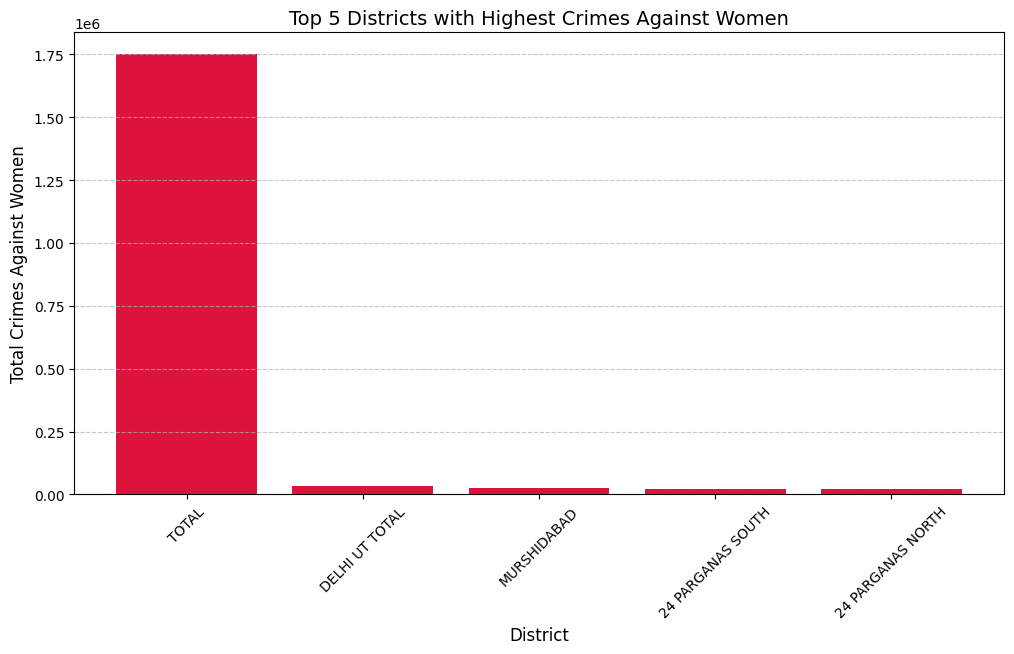

            DISTRICT  TOTAL_CRIMES
0              TOTAL       1750311
1     DELHI UT TOTAL         32438
2        MURSHIDABAD         24485
3  24 PARGANAS SOUTH         22992
4  24 PARGANAS NORTH         21978


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Load the dataset
file_path = "Downloads/project/01_District_wise_crimes_committed_IPC_2001_2012.csv"
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print("Error: File not found. Please ensure the file is uploaded correctly.")
    exit()

# Selecting relevant columns related to crimes against women
crime_columns = [
    "DISTRICT", "RAPE", "DOWRY DEATHS", "ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY", 
    "INSULT TO MODESTY OF WOMEN", "CRUELTY BY HUSBAND OR HIS RELATIVES"
]

# Checking if all columns exist in the dataset
missing_columns = [col for col in crime_columns if col not in df.columns]
if missing_columns:
    print(f"Error: Missing columns in the dataset: {missing_columns}")
    exit()

# Create SQLite database in memory
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

# Save dataframe to SQL table
df[crime_columns].to_sql("crime_data", conn, if_exists="replace", index=False)

# SQL query to compute total crimes per district and get top 5
query = """
    SELECT DISTRICT, 
           SUM(RAPE + "DOWRY DEATHS" + "ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY" + 
               "INSULT TO MODESTY OF WOMEN" + "CRUELTY BY HUSBAND OR HIS RELATIVES") AS TOTAL_CRIMES
    FROM crime_data
    GROUP BY DISTRICT
    ORDER BY TOTAL_CRIMES DESC
    LIMIT 5;
"""

# Execute query and fetch results
top_5_districts = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Plotting the results
plt.figure(figsize=(12, 6))
plt.bar(top_5_districts["DISTRICT"], top_5_districts["TOTAL_CRIMES"], color="crimson")
plt.title("Top 5 Districts with Highest Crimes Against Women", fontsize=14)
plt.xlabel("District", fontsize=12)
plt.ylabel("Total Crimes Against Women", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Display the top 5 districts
print(top_5_districts)

In [ ]:
#6 Reasons Behind Violent Crimes: Using the dataset, analyze the primary reasons associated with incidents of kidnapping and murder. 

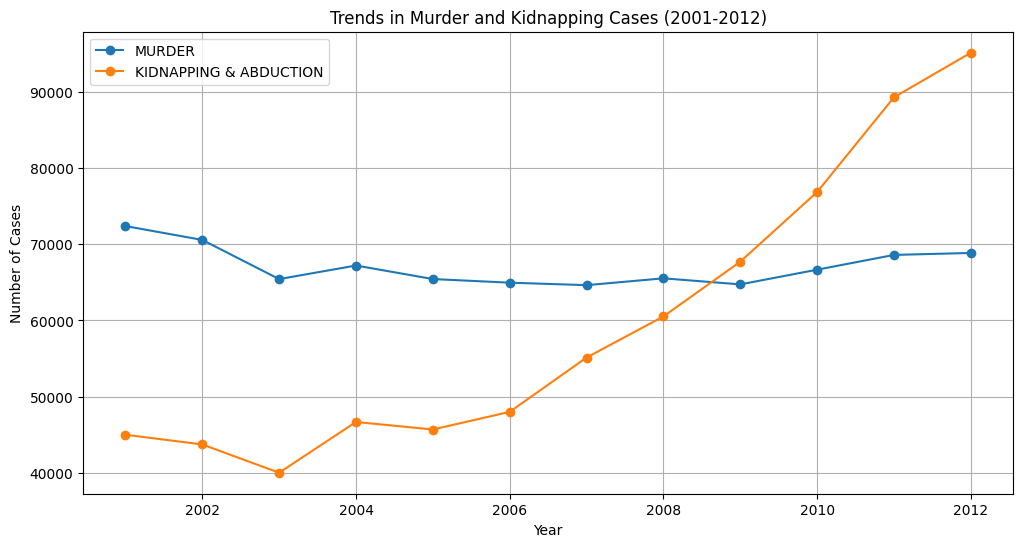

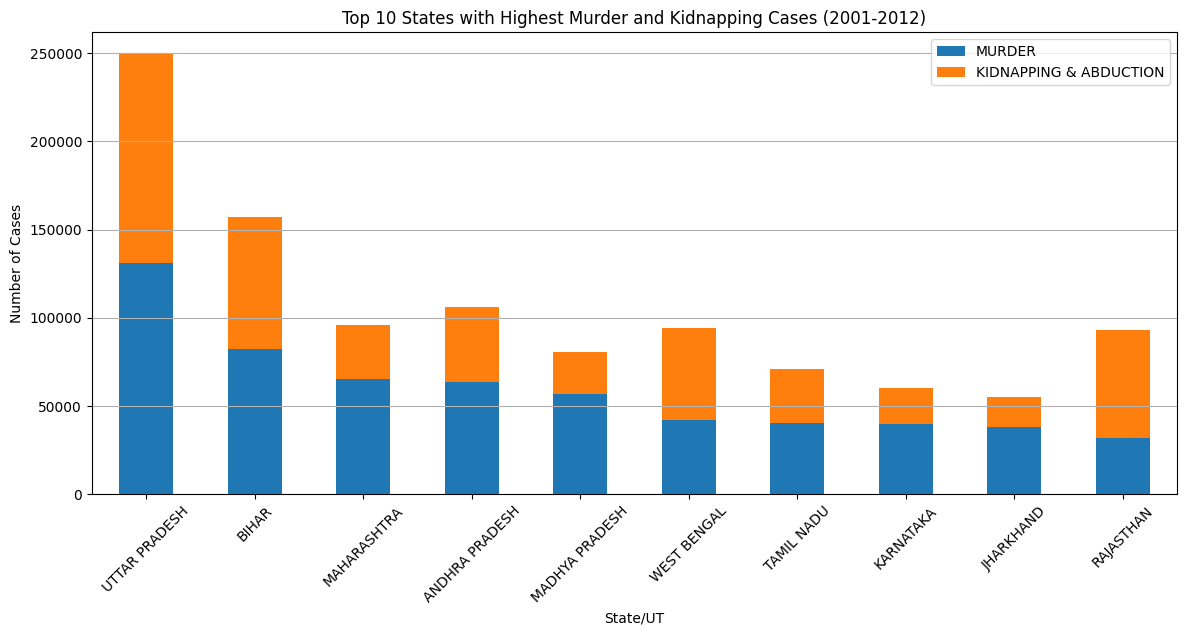

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Downloads/project/01_District_wise_crimes_committed_IPC_2001_2012.csv"  # Update with correct path
df = pd.read_csv(file_path)

# Aggregate data by year to identify trends
yearly_data = df.groupby("YEAR")[["MURDER", "KIDNAPPING & ABDUCTION"]].sum()

# Plot trends over the years
yearly_data.plot(kind="line", marker="o", figsize=(12, 6), title="Trends in Murder and Kidnapping Cases (2001-2012)")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.grid(True)
plt.show()

# Aggregate data by state to find crime distribution
statewise_data = df.groupby("STATE/UT")[["MURDER", "KIDNAPPING & ABDUCTION"]].sum().sort_values(by="MURDER", ascending=False)

# Plot top 10 states with highest murder and kidnapping cases
statewise_data.head(10).plot(kind="bar", stacked=True, figsize=(14, 6), title="Top 10 States with Highest Murder and Kidnapping Cases (2001-2012)")
plt.xlabel("State/UT")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


In [ ]:
#6 using sql approach

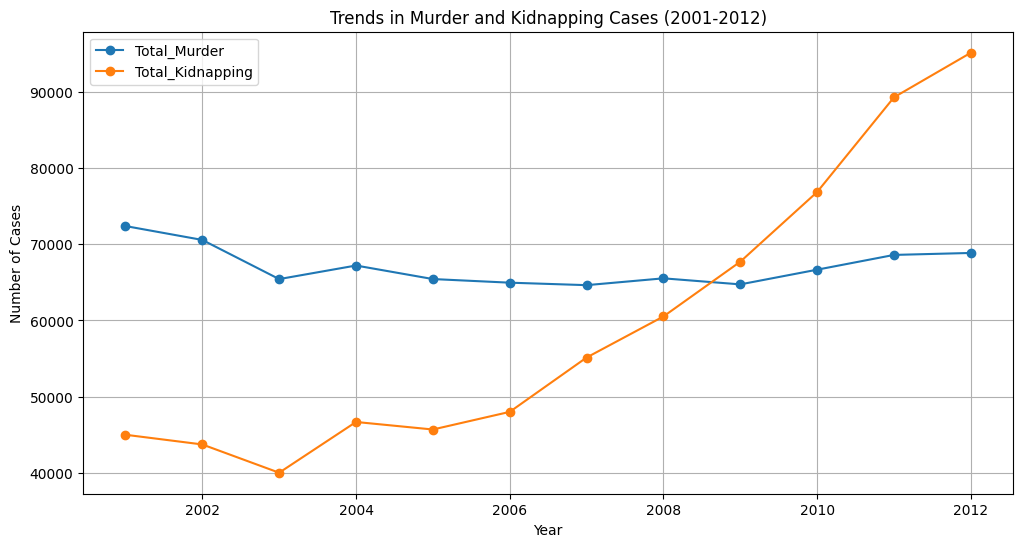

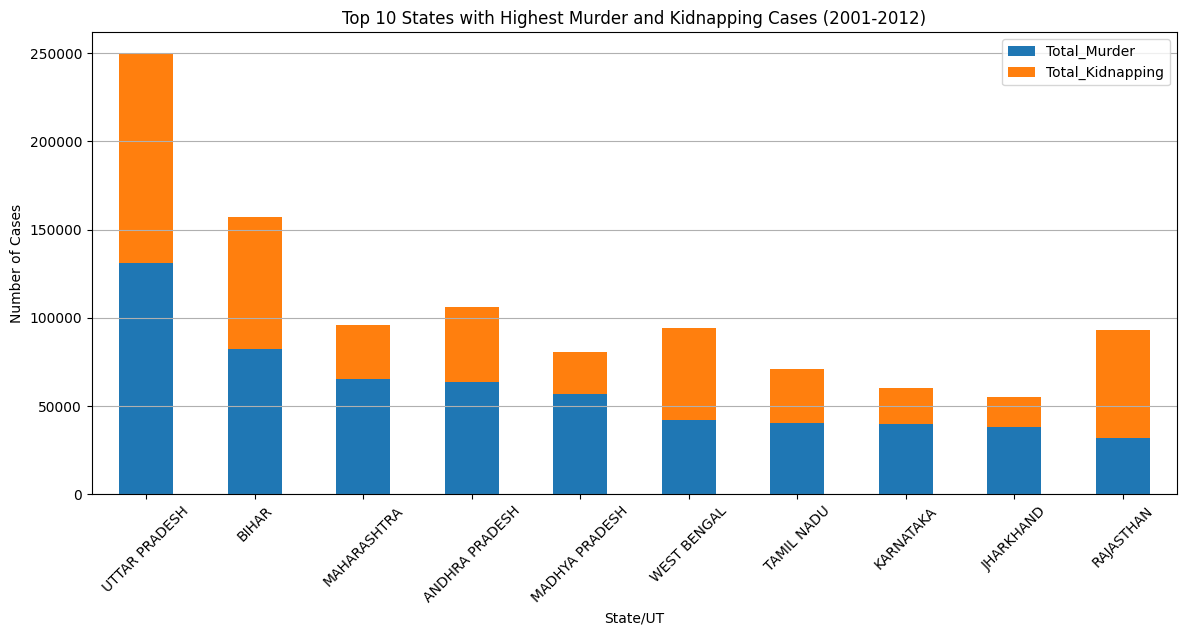

In [5]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Load dataset
file_path = "Downloads/project/01_District_wise_crimes_committed_IPC_2001_2012.csv"  # Update the path if needed
df = pd.read_csv(file_path)

# Create SQLite database and table
conn = sqlite3.connect(":memory:")  # Use in-memory database for temporary storage
df.to_sql("crime_data", conn, if_exists="replace", index=False)

# SQL Query: Aggregate data by year
query_yearly = """
SELECT YEAR, SUM(MURDER) AS Total_Murder, SUM("KIDNAPPING & ABDUCTION") AS Total_Kidnapping
FROM crime_data
GROUP BY YEAR
ORDER BY YEAR;
"""
yearly_data = pd.read_sql(query_yearly, conn)

# Plot trends over the years
yearly_data.plot(x="YEAR", y=["Total_Murder", "Total_Kidnapping"], kind="line", marker="o", figsize=(12, 6), title="Trends in Murder and Kidnapping Cases (2001-2012)")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.grid(True)
plt.show()

# SQL Query: Aggregate data by state
query_statewise = """
SELECT "STATE/UT", SUM(MURDER) AS Total_Murder, SUM("KIDNAPPING & ABDUCTION") AS Total_Kidnapping
FROM crime_data
GROUP BY "STATE/UT"
ORDER BY Total_Murder DESC
LIMIT 10;
"""
statewise_data = pd.read_sql(query_statewise, conn)

# Plot top 10 states with highest murder and kidnapping cases
statewise_data.set_index("STATE/UT").plot(kind="bar", stacked=True, figsize=(14, 6), title="Top 10 States with Highest Murder and Kidnapping Cases (2001-2012)")
plt.xlabel("State/UT")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# Close connection
conn.close()


In [ ]:
#7 Crime Pair Analysis: Identify the top ten pairs of crimes where one crime tends to lead to another (e.g., kidnapping leading to murder, custodial torture leading to custodial death, rape leading to murder, etc.). 

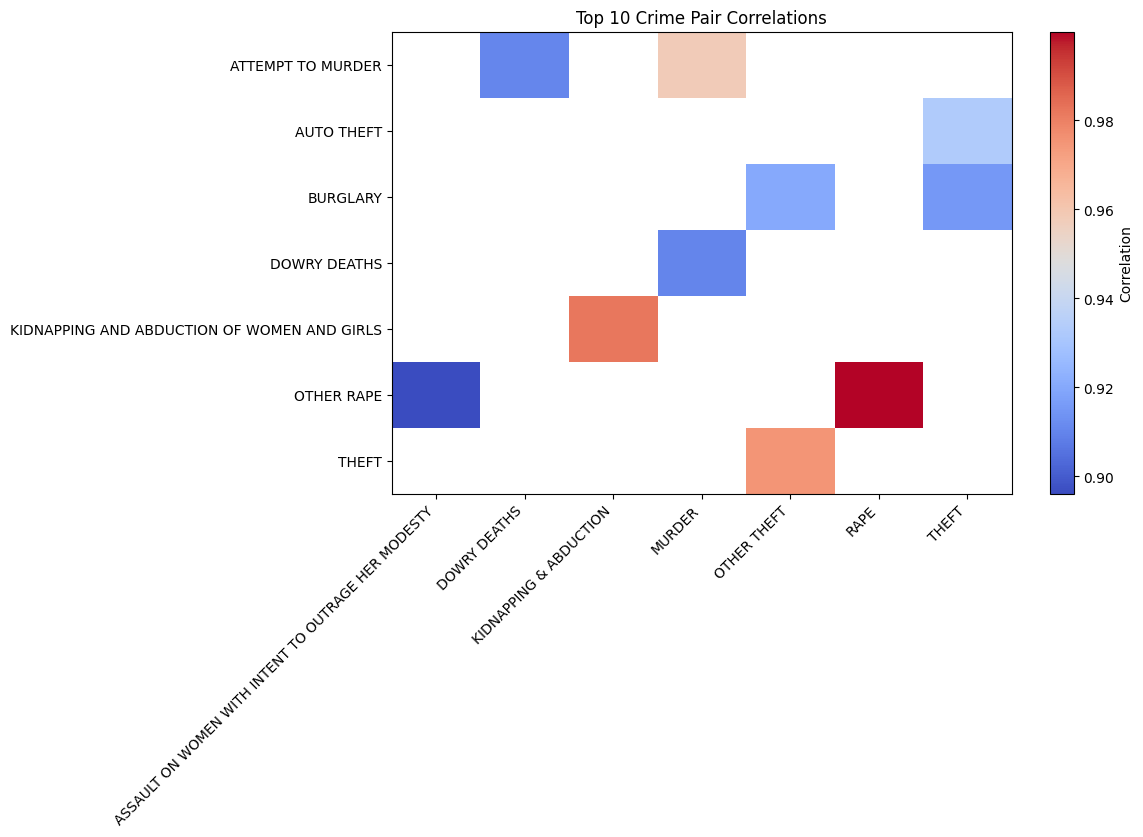

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "Downloads/project/01_District_wise_crimes_committed_IPC_2001_2012.csv"
df = pd.read_csv(file_path)

# Selecting only crime-related columns
crime_columns = df.columns[3:-1]  # Exclude non-crime columns

# Compute pairwise crime correlations using pandas only
correlation_matrix = df[crime_columns].corr().stack().reset_index()
correlation_matrix.columns = ["Crime 1", "Crime 2", "Correlation"]

# Remove self-correlations
correlation_matrix = correlation_matrix[correlation_matrix["Crime 1"] != correlation_matrix["Crime 2"]]

# Sort by absolute correlation and pick top 10 unique pairs
top_10_pairs = correlation_matrix.sort_values(by="Correlation", ascending=False).drop_duplicates(subset=["Correlation"]).head(10)

# Create a pivot table for visualization
heatmap_data = top_10_pairs.pivot(index="Crime 1", columns="Crime 2", values="Correlation")

# Plot heatmap using Matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(heatmap_data, cmap="coolwarm", aspect="auto")
plt.colorbar(label="Correlation")
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns, rotation=45, ha="right")
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)
plt.title("Top 10 Crime Pair Correlations")
plt.show()


In [ ]:
#8  Safest States for Women: Determine the top five states that are statistically the safest for women, based on crime rates related to women’s safety. 

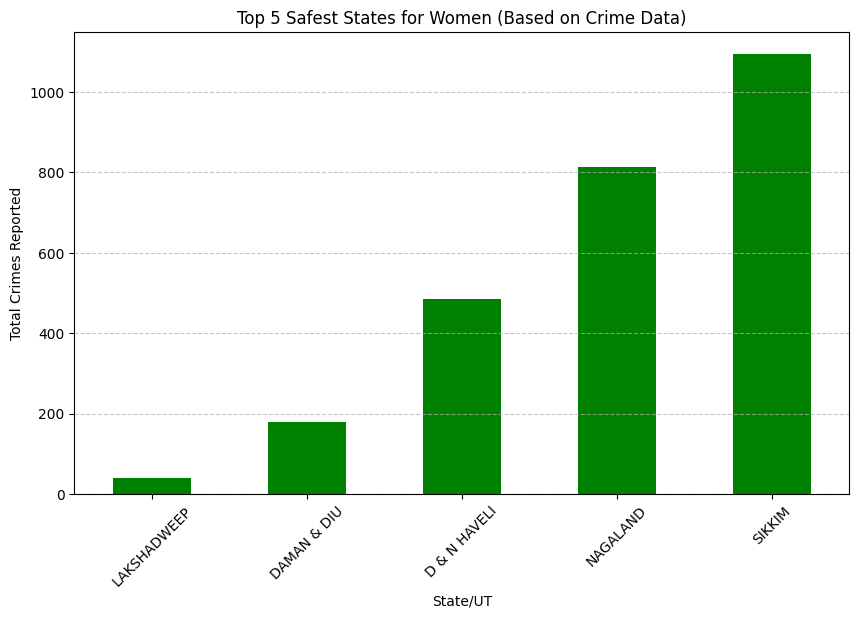

              Rape  Kidnapping and Abduction  Dowry Deaths  \
STATE/UT                                                     
LAKSHADWEEP     14                         2             0   
DAMAN & DIU     40                        30             6   
D & N HAVELI   112                       188             2   
NAGALAND       440                       142             0   
SIKKIM         390                       124             4   

              Assault on women with intent to outrage her modesty  \
STATE/UT                                                            
LAKSHADWEEP                                                  10     
DAMAN & DIU                                                  30     
D & N HAVELI                                                100     
NAGALAND                                                    192     
SIKKIM                                                      460     

              Insult to modesty of Women  Cruelty by Husband or his Relatives  \


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Downloads/project/question 8 women.csv"
df = pd.read_csv(file_path)

# Define crime-related columns
crime_columns = [
    "Rape", "Kidnapping and Abduction", "Dowry Deaths",
    "Assault on women with intent to outrage her modesty",
    "Insult to modesty of Women", "Cruelty by Husband or his Relatives",
    "Importation of Girls"
]

# Aggregate total crimes per state
statewise_crime = df.groupby("STATE/UT")[crime_columns].sum()

# Compute total crimes per state
statewise_crime["Total Crimes"] = statewise_crime.sum(axis=1)

# Get the top 5 safest states (lowest crime count)
safest_states = statewise_crime.nsmallest(5, "Total Crimes")

# Plot the top 5 safest states
plt.figure(figsize=(10, 6))
safest_states["Total Crimes"].plot(kind="bar", color="green")
plt.title("Top 5 Safest States for Women (Based on Crime Data)")
plt.xlabel("State/UT")
plt.ylabel("Total Crimes Reported")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Display results
print(safest_states)

In [ ]:
#8 using sql approach

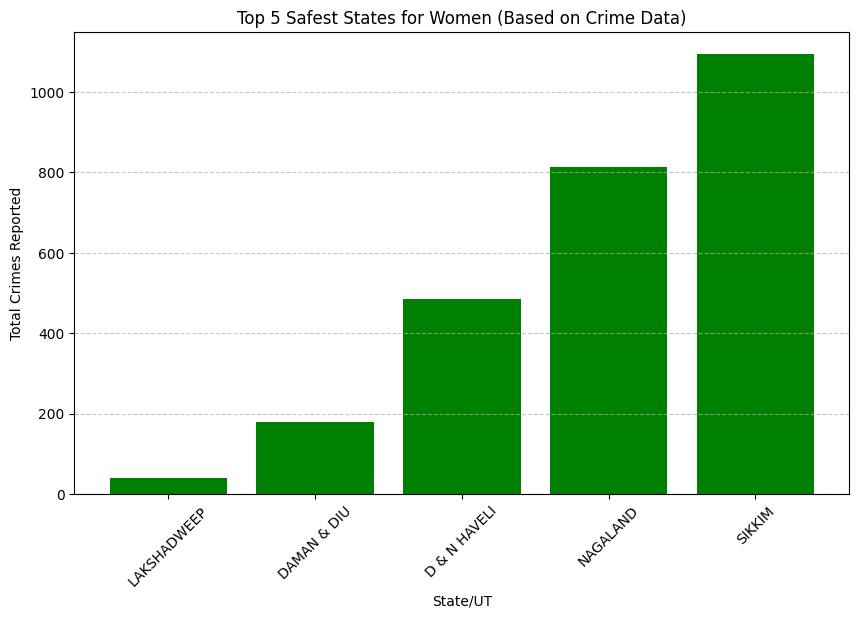

       STATE/UT  Rape  Kidnapping_Abduction  Dowry_Deaths  Assault  Insult  \
0   LAKSHADWEEP    14                     2             0       10       0   
1   DAMAN & DIU    40                    30             6       30       4   
2  D & N HAVELI   112                   188             2      100       8   
3      NAGALAND   440                   142             0      192      20   
4        SIKKIM   390                   124             4      460      28   

   Cruelty  Importation  Total_Crimes  
0       14            0            40  
1       70            0           180  
2       76            0           486  
3       18            2           814  
4       88            0          1094  


In [3]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Downloads/project/question 8 women.csv"
df = pd.read_csv(file_path)

# Create SQLite database and table
conn = sqlite3.connect(":memory:")
df.to_sql("crime_data", conn, index=False, if_exists="replace")

# Define crime-related columns
crime_columns = [
    "Rape", "Kidnapping and Abduction", "Dowry Deaths",
    "Assault on women with intent to outrage her modesty",
    "Insult to modesty of Women", "Cruelty by Husband or his Relatives",
    "Importation of Girls"
]

# Construct SQL query to aggregate total crimes per state
query = f'''
    SELECT "STATE/UT", 
           SUM("Rape") AS Rape, 
           SUM("Kidnapping and Abduction") AS Kidnapping_Abduction, 
           SUM("Dowry Deaths") AS Dowry_Deaths, 
           SUM("Assault on women with intent to outrage her modesty") AS Assault, 
           SUM("Insult to modesty of Women") AS Insult, 
           SUM("Cruelty by Husband or his Relatives") AS Cruelty, 
           SUM("Importation of Girls") AS Importation, 
           (SUM("Rape") + SUM("Kidnapping and Abduction") + SUM("Dowry Deaths") + 
            SUM("Assault on women with intent to outrage her modesty") + SUM("Insult to modesty of Women") + 
            SUM("Cruelty by Husband or his Relatives") + SUM("Importation of Girls")) AS Total_Crimes
    FROM crime_data
    GROUP BY "STATE/UT"
    ORDER BY Total_Crimes ASC
    LIMIT 5
'''

# Execute query and store result in DataFrame
safest_states = pd.read_sql(query, conn)

# Plot the top 5 safest states
plt.figure(figsize=(10, 6))
plt.bar(safest_states["STATE/UT"], safest_states["Total_Crimes"], color="green")
plt.title("Top 5 Safest States for Women (Based on Crime Data)")
plt.xlabel("State/UT")
plt.ylabel("Total Crimes Reported")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Display results
print(safest_states)

# Close the connection
conn.close()


In [ ]:
#9 Safest Cities for Women: Identify the top five cities with the lowest crime rates against women. 

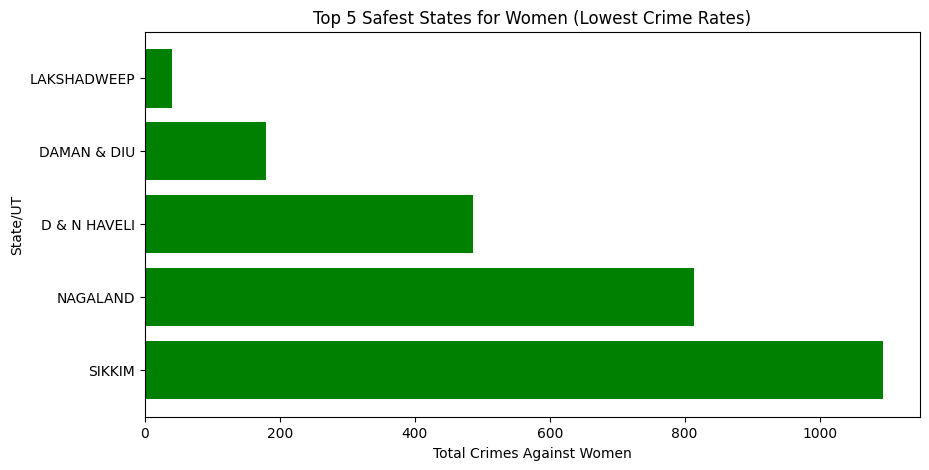

,STATE/UT,Total Crimes
18,LAKSHADWEEP,40
8,DAMAN & DIU,180
7,D & N HAVELI,486
24,NAGALAND,814
29,SIKKIM,1094


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Downloads/project/question 8 women.csv"  # Update this path if needed
df = pd.read_csv(file_path)

# Calculate total crimes against women
df['Total Crimes'] = df.iloc[:, 3:].sum(axis=1)  # Sum all crime categories

# Aggregate crime data at the state level
state_crime = df.groupby("STATE/UT")["Total Crimes"].sum().reset_index()

# Identify the top 5 safest states (lowest total crimes)
safest_states = state_crime.nsmallest(5, "Total Crimes")

# Visualization
plt.figure(figsize=(10, 5))
plt.barh(safest_states["STATE/UT"], safest_states["Total Crimes"], color='green')
plt.xlabel("Total Crimes Against Women")
plt.ylabel("State/UT")
plt.title("Top 5 Safest States for Women (Lowest Crime Rates)")
plt.gca().invert_yaxis()  # Invert to show lowest crime rate at the top
plt.show()

# Display the safest states
display(safest_states)

In [ ]:
#8 using sql apprach

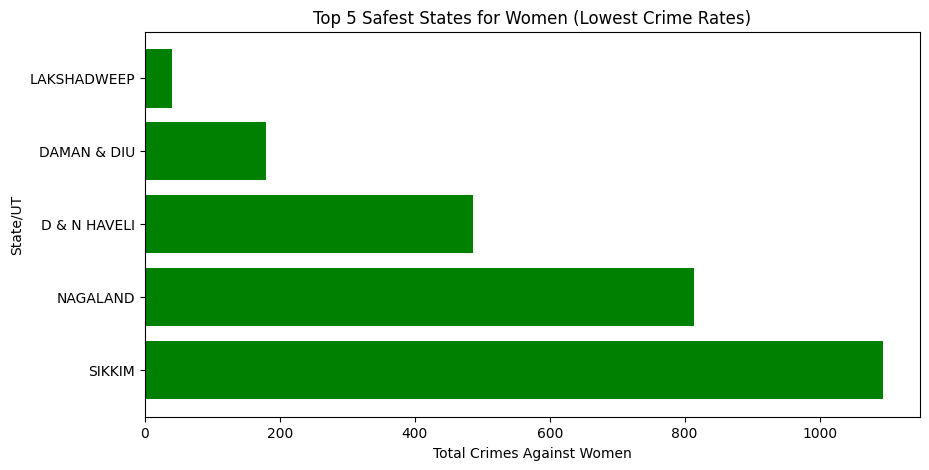

,STATE/UT,total_crimes
0,LAKSHADWEEP,40
1,DAMAN & DIU,180
2,D & N HAVELI,486
3,NAGALAND,814
4,SIKKIM,1094


In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Downloads/project/question 8 women.csv"  # Update this path if needed
df = pd.read_csv(file_path)

# Calculate total crimes against women
df['Total Crimes'] = df.iloc[:, 3:].sum(axis=1)  # Sum all crime categories

# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')
df.to_sql('crime_data', conn, index=False, if_exists='replace')

# SQL query to get the top 5 safest states
query = """
SELECT "STATE/UT", SUM("Total Crimes") as total_crimes
FROM crime_data
GROUP BY "STATE/UT"
ORDER BY total_crimes ASC
LIMIT 5;
"""
safest_states = pd.read_sql(query, conn)

# Visualization
plt.figure(figsize=(10, 5))
plt.barh(safest_states["STATE/UT"], safest_states["total_crimes"], color='green')
plt.xlabel("Total Crimes Against Women")
plt.ylabel("State/UT")
plt.title("Top 5 Safest States for Women (Lowest Crime Rates)")
plt.gca().invert_yaxis()  # Invert to show lowest crime rate at the top
plt.show()

# Display the safest states
display(safest_states)

# Close the database connection
conn.close()

In [ ]:
#10  Profile of Rape Offenders: Categorize and rank the top three relationships between rape offenders and their victims based on recorded data. 

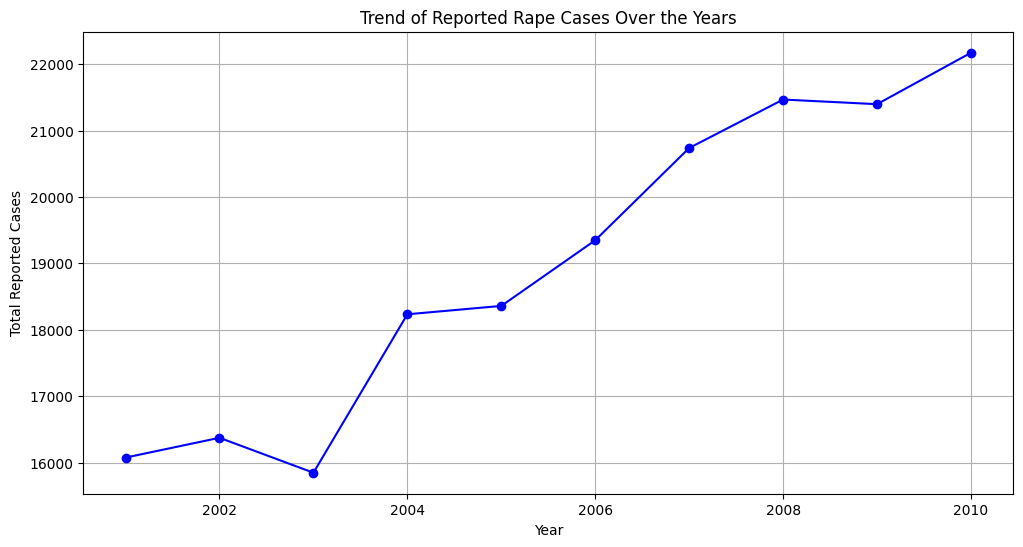

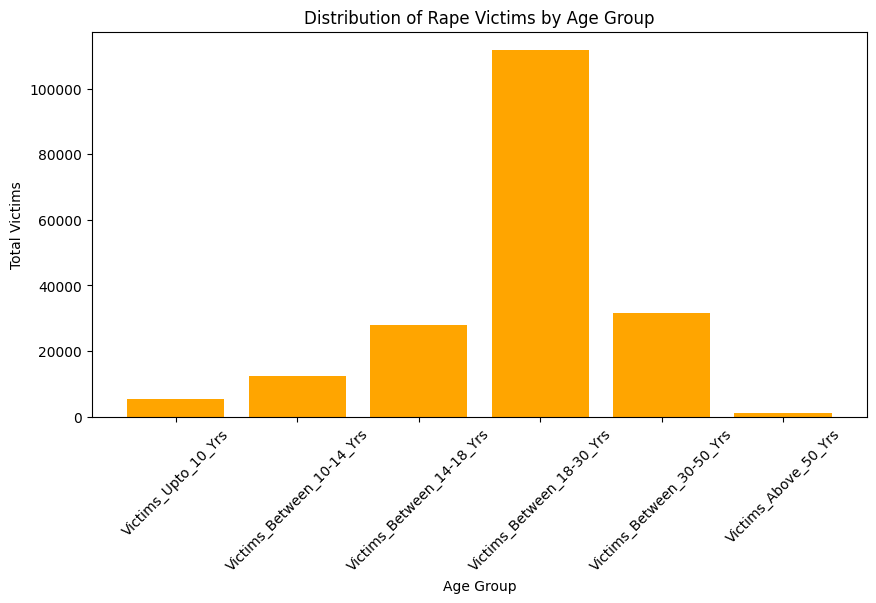

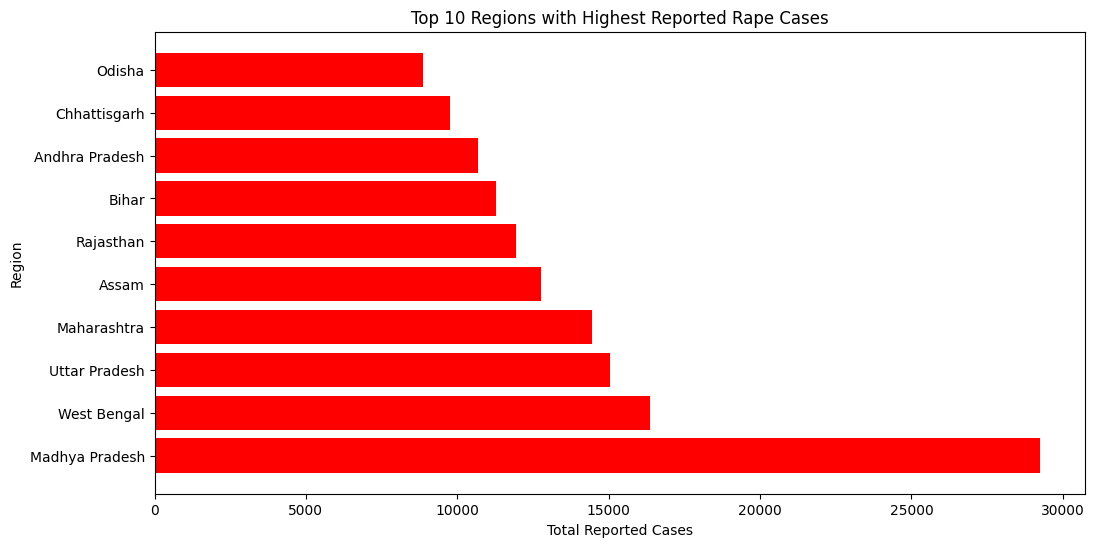

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Downloads/project/question 10.csv"
df = pd.read_csv(file_path)

# Data Cleaning: Remove unwanted spaces, check for missing values
df.columns = df.columns.str.strip()
df.dropna(inplace=True)

# Aggregate total rape cases per year
yearly_cases = df[df['Subgroup'] == 'Total Rape Victims'].groupby('Year')['Rape_Cases_Reported'].sum()

# Plot trend of total rape cases per year
plt.figure(figsize=(12, 6))
plt.plot(yearly_cases.index, yearly_cases.values, marker='o', linestyle='-', color='b')
plt.title('Trend of Reported Rape Cases Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Reported Cases')
plt.grid(True)
plt.show()

# Distribution of Victims Across Age Groups
age_groups = ['Victims_Upto_10_Yrs', 'Victims_Between_10-14_Yrs', 'Victims_Between_14-18_Yrs', 
              'Victims_Between_18-30_Yrs', 'Victims_Between_30-50_Yrs', 'Victims_Above_50_Yrs']
age_distribution = df[df['Subgroup'] == 'Total Rape Victims'][age_groups].sum()

# Plot the victim distribution
plt.figure(figsize=(10, 5))
plt.bar(age_distribution.index, age_distribution.values, color='orange')
plt.title('Distribution of Rape Victims by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Victims')
plt.xticks(rotation=45)
plt.show()

# Top 10 Areas with Highest Reported Cases
top_areas = df[df['Subgroup'] == 'Total Rape Victims'].groupby('Area_Name')['Rape_Cases_Reported'].sum().nlargest(10)

# Plot top areas
plt.figure(figsize=(12, 6))
plt.barh(top_areas.index, top_areas.values, color='red')
plt.title('Top 10 Regions with Highest Reported Rape Cases')
plt.xlabel('Total Reported Cases')
plt.ylabel('Region')
plt.show()

In [ ]:
#11 a. Analyze whether there is a correlation between a person’s salary and their likelihood of engaging in criminal activities. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   area_name                                            350 non-null    object
 1   year                                                 350 non-null    int64 
 2   sub_group_name                                       350 non-null    object
 3   economic_set_up_annual_income_250001_to_50000        350 non-null    int64 
 4   economic_set_up_annual_income_upto_rs_25000          350 non-null    int64 
 5   economic_set_up_middle_income_from_100001_to_200000  350 non-null    int64 
 6   economic_set_up_middle_income_from_50001_to_100000   350 non-null    int64 
 7   Salary                                               350 non-null    int64 
 8   Crime rate                                           350 non-null    int64 
 9  

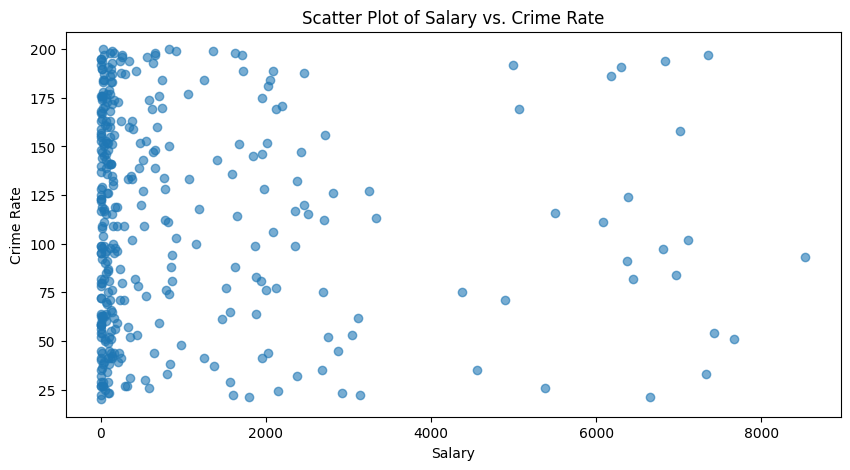

Correlation Matrix:
               salary  crime_rate
salary      1.000000   -0.046493
crime_rate -0.046493    1.000000


<Figure size 1000x500 with 0 Axes>

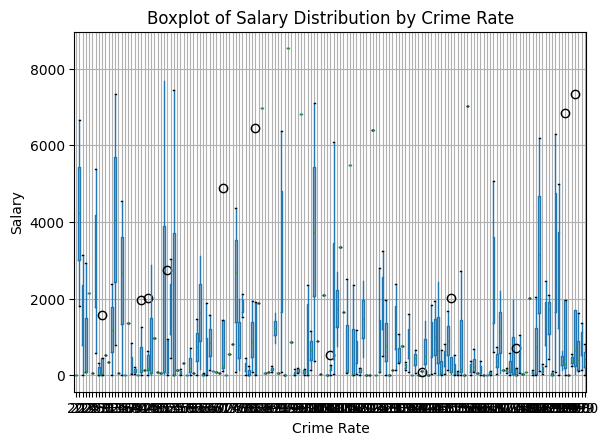

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Downloads/project/economic question 11.csv")

# Display basic information
print(df.info())
print(df.describe())

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Print column names to verify correct naming
print("Column Names:", df.columns)

# Rename columns if necessary (Assuming relevant columns are 'Salary' and 'Crime_Rate')
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]  # Standardizing column names to lowercase
print("Updated Column Names:", df.columns)

# Verify if 'crime_rate' exists
if 'crime_rate' not in df.columns or 'salary' not in df.columns:
    raise KeyError("Required columns 'crime_rate' or 'salary' not found in the dataset. Check column names.")

# Scatter plot to visualize the relationship between salary and crime likelihood
plt.figure(figsize=(10, 5))
plt.scatter(df['salary'], df['crime_rate'], alpha=0.6)
plt.xlabel("Salary")
plt.ylabel("Crime Rate")
plt.title("Scatter Plot of Salary vs. Crime Rate")
plt.show()

# Correlation coefficient
correlation = df[['salary', 'crime_rate']].corr()
print("Correlation Matrix:\n", correlation)

# Boxplot to check salary distribution among individuals engaging in crime
plt.figure(figsize=(10, 5))
df.boxplot(column='salary', by='crime_rate')
plt.xlabel("Crime Rate")
plt.ylabel("Salary")
plt.title("Boxplot of Salary Distribution by Crime Rate")
plt.suptitle("")  # Removes default matplotlib title
plt.show()

In [ ]:
#b. Examine how literacy rates influence the likelihood of an individual being involved in crimes. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   area_name                                            350 non-null    object
 1   year                                                 350 non-null    int64 
 2   sub_group_name                                       350 non-null    object
 3   economic_set_up_annual_income_250001_to_50000        350 non-null    int64 
 4   economic_set_up_annual_income_upto_rs_25000          350 non-null    int64 
 5   economic_set_up_middle_income_from_100001_to_200000  350 non-null    int64 
 6   economic_set_up_middle_income_from_50001_to_100000   350 non-null    int64 
 7   Salary                                               350 non-null    int64 
 8   Crime rate                                           350 non-null    int64 
 9  

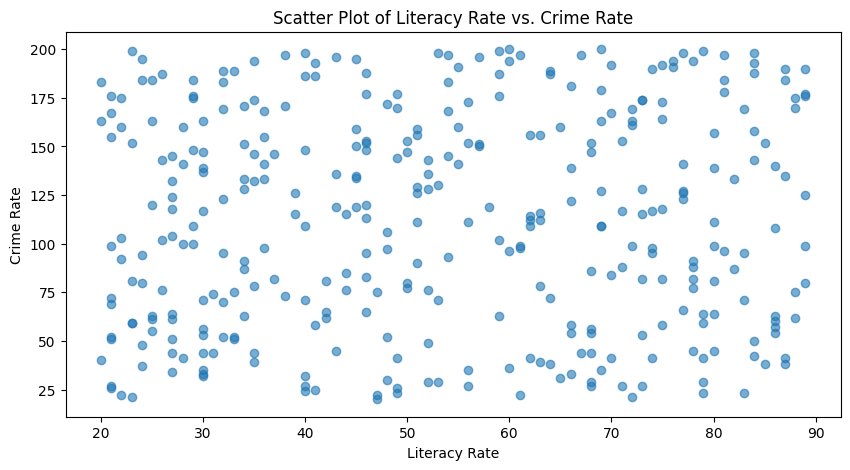

Correlation Matrix:
                literacy_rate  crime_rate
literacy_rate       1.000000    0.051959
crime_rate          0.051959    1.000000


<Figure size 1000x500 with 0 Axes>

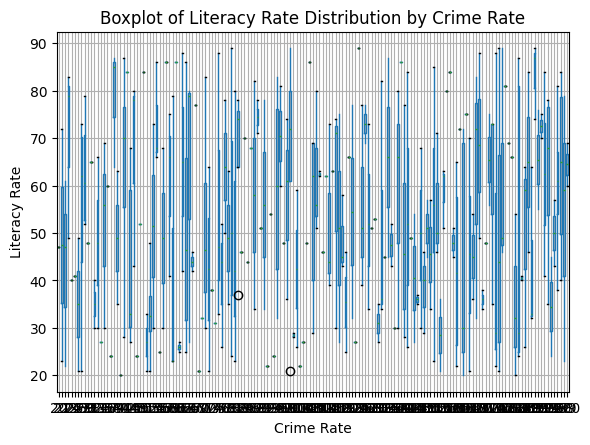

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Downloads/project/economic question 11.csv")

# Display basic information
print(df.info())
print(df.describe())

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Print column names to verify correct naming
print("Column Names:", df.columns)

# Rename columns if necessary (Assuming relevant columns are 'Literacy_Rate' and 'Crime_Rate')
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]  # Standardizing column names to lowercase
print("Updated Column Names:", df.columns)

# Verify if 'literacy_rate' and 'crime_rate' exist
if 'literacy_rate' not in df.columns or 'crime_rate' not in df.columns:
    raise KeyError("Required columns 'literacy_rate' or 'crime_rate' not found in the dataset. Check column names.")

# Scatter plot to visualize the relationship between literacy rate and crime likelihood
plt.figure(figsize=(10, 5))
plt.scatter(df['literacy_rate'], df['crime_rate'], alpha=0.6)
plt.xlabel("Literacy Rate")
plt.ylabel("Crime Rate")
plt.title("Scatter Plot of Literacy Rate vs. Crime Rate")
plt.show()

# Correlation coefficient
correlation = df[['literacy_rate', 'crime_rate']].corr()
print("Correlation Matrix:\n", correlation)

# Boxplot to check literacy rate distribution among individuals engaging in crime
plt.figure(figsize=(10, 5))
df.boxplot(column='literacy_rate', by='crime_rate')
plt.xlabel("Crime Rate")
plt.ylabel("Literacy Rate")
plt.title("Boxplot of Literacy Rate Distribution by Crime Rate")
plt.suptitle("")  # Removes default matplotlib title
plt.show()

In [ ]:
#12 a. Identify the top three reasons at the state level for juveniles (individuals under 18 years of age) being involved in crimes.

C:\Users\shris\AppData\Local\Temp\ipykernel_8220\697569628.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_crimes_by_state = grouped_df.groupby('state/ut', group_keys=False).apply(get_top_crimes).reset_index(drop=True)


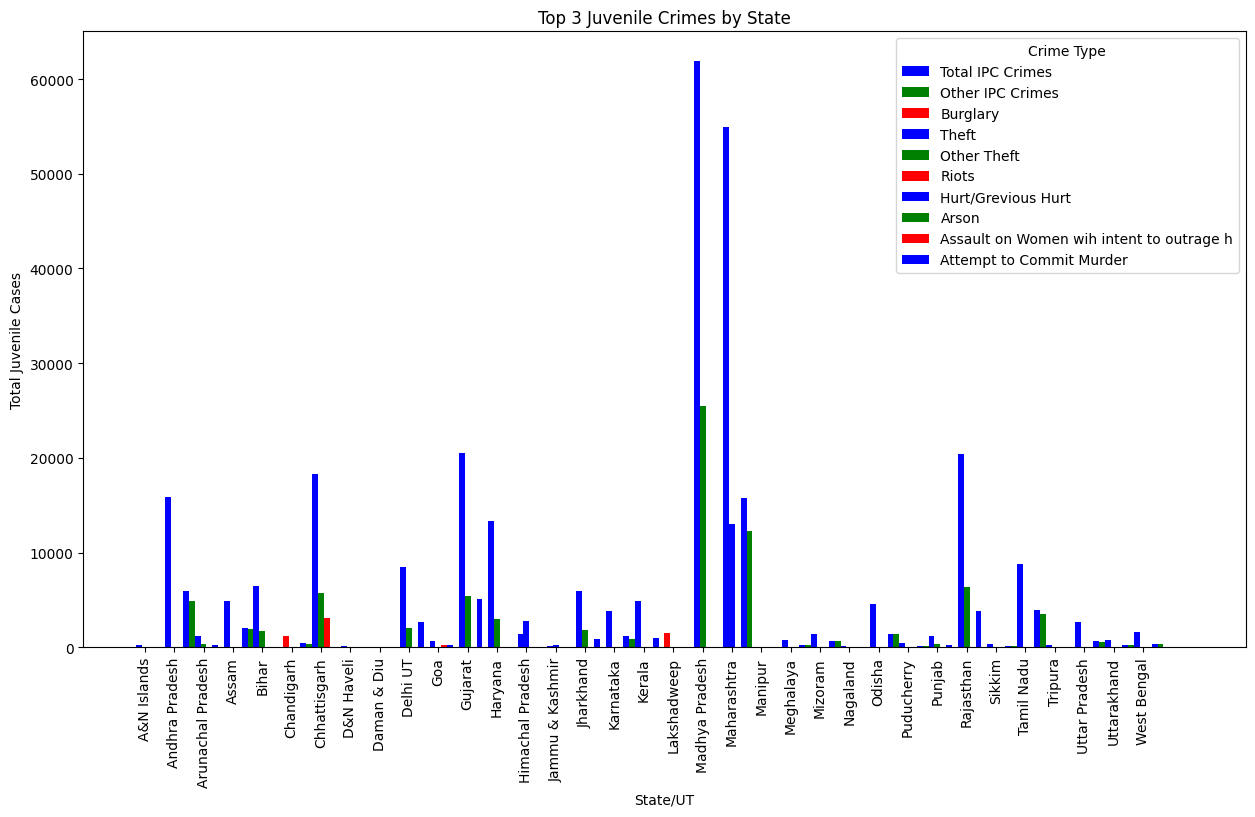

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Downloads/project/question 12 juveniles.csv"
df = pd.read_csv(file_path)

# Group by state and crime, summing the total number of juveniles involved
grouped_df = df.groupby(['state/ut', 'crime'], as_index=False)['grand_total'].sum()

# Get top 3 crimes per state
def get_top_crimes(state_df):
    return state_df.nlargest(3, 'grand_total')

top_crimes_by_state = grouped_df.groupby('state/ut', group_keys=False).apply(get_top_crimes).reset_index(drop=True)

# Visualization
plt.figure(figsize=(15, 8))
states = top_crimes_by_state['state/ut'].unique()
bar_width = 0.2
x_indexes = list(range(len(states)))

# Extract top crimes
crime_types = top_crimes_by_state['crime'].unique()
colors = ['b', 'g', 'r']  # Different colors for different crimes

for i, crime in enumerate(crime_types):
    crime_data = top_crimes_by_state[top_crimes_by_state['crime'] == crime]
    crime_totals = [crime_data.loc[crime_data['state/ut'] == state, 'grand_total'].sum() if state in crime_data['state/ut'].values else 0 for state in states]
    plt.bar([x + i * bar_width for x in x_indexes], crime_totals, width=bar_width, label=crime, color=colors[i % len(colors)])

plt.xticks([x + bar_width for x in x_indexes], states, rotation=90)
plt.xlabel("State/UT")
plt.ylabel("Total Juvenile Cases")
plt.title("Top 3 Juvenile Crimes by State")
plt.legend(title="Crime Type")
plt.show()


In [ ]:
#12 b. Determine the top ten states with the highest number of juvenile crime cases. 

C:\Users\shris\AppData\Local\Temp\ipykernel_5144\1020883229.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_crimes_by_state = grouped_df.groupby('state/ut', group_keys=False).apply(get_top_crimes).reset_index(drop=True)


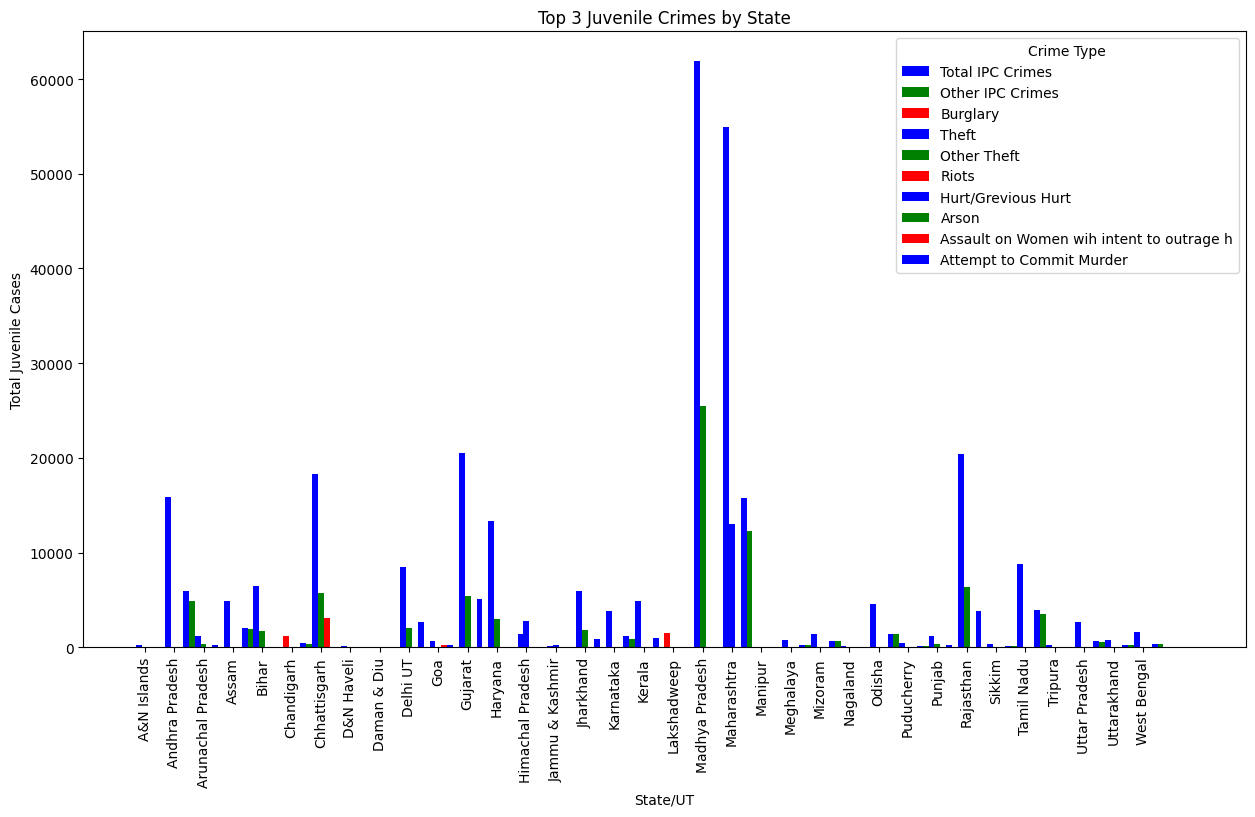

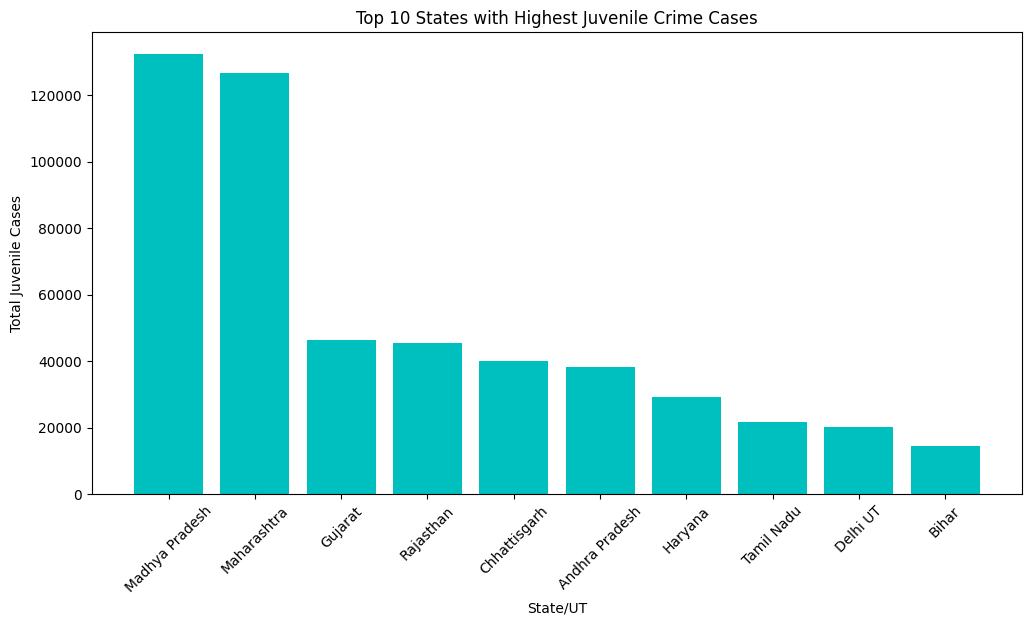

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Downloads/project/question 12 juveniles.csv"
df = pd.read_csv(file_path)

# Group by state and crime, summing the total number of juveniles involved
grouped_df = df.groupby(['state/ut', 'crime'], as_index=False)['grand_total'].sum()

# Get top 3 crimes per state
def get_top_crimes(state_df):
    return state_df.nlargest(3, 'grand_total')

top_crimes_by_state = grouped_df.groupby('state/ut', group_keys=False).apply(get_top_crimes).reset_index(drop=True)

# Visualization for top 3 crimes per state
plt.figure(figsize=(15, 8))
states = top_crimes_by_state['state/ut'].unique()
bar_width = 0.2
x_indexes = list(range(len(states)))

# Extract top crimes
crime_types = top_crimes_by_state['crime'].unique()
colors = ['b', 'g', 'r']  # Different colors for different crimes

for i, crime in enumerate(crime_types):
    crime_data = top_crimes_by_state[top_crimes_by_state['crime'] == crime]
    crime_totals = [crime_data.loc[crime_data['state/ut'] == state, 'grand_total'].sum() if state in crime_data['state/ut'].values else 0 for state in states]
    plt.bar([x + i * bar_width for x in x_indexes], crime_totals, width=bar_width, label=crime, color=colors[i % len(colors)])

plt.xticks([x + bar_width for x in x_indexes], states, rotation=90)
plt.xlabel("State/UT")
plt.ylabel("Total Juvenile Cases")
plt.title("Top 3 Juvenile Crimes by State")
plt.legend(title="Crime Type")
plt.show()

# Determine the top ten states with the highest number of juvenile crime cases
total_crimes_by_state = df.groupby('state/ut', as_index=False)['grand_total'].sum()
top_10_states = total_crimes_by_state.nlargest(10, 'grand_total')

# Visualization for top 10 states
plt.figure(figsize=(12, 6))
plt.bar(top_10_states['state/ut'], top_10_states['grand_total'], color='c')
plt.xlabel("State/UT")
plt.ylabel("Total Juvenile Cases")
plt.title("Top 10 States with Highest Juvenile Crime Cases")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#13  Crime Rate Trends Over Time: Calculate the rate of change in total crimes for each state over the given timeline and identify states with significant increases or decreases.

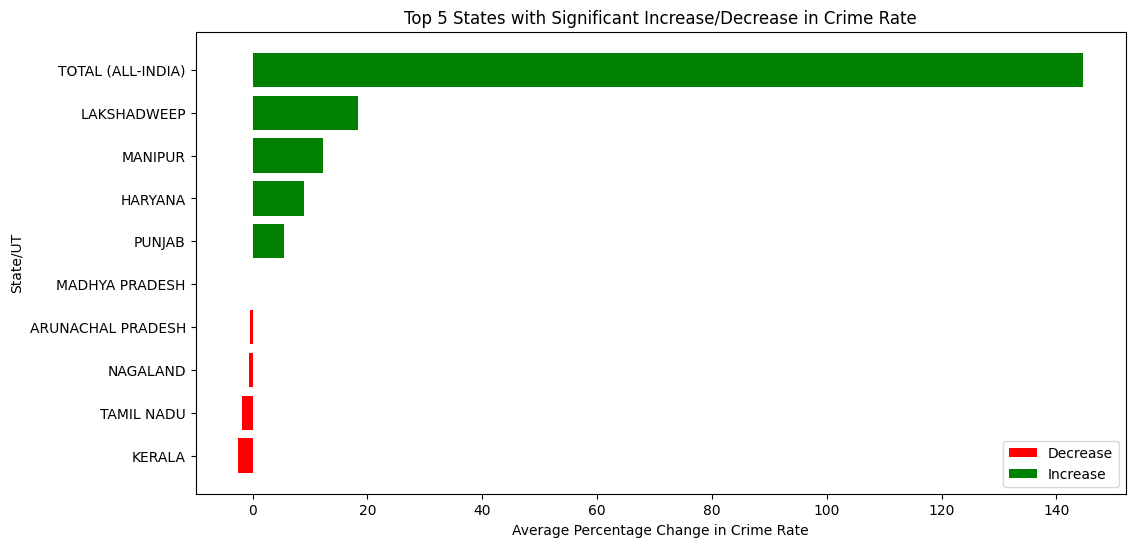

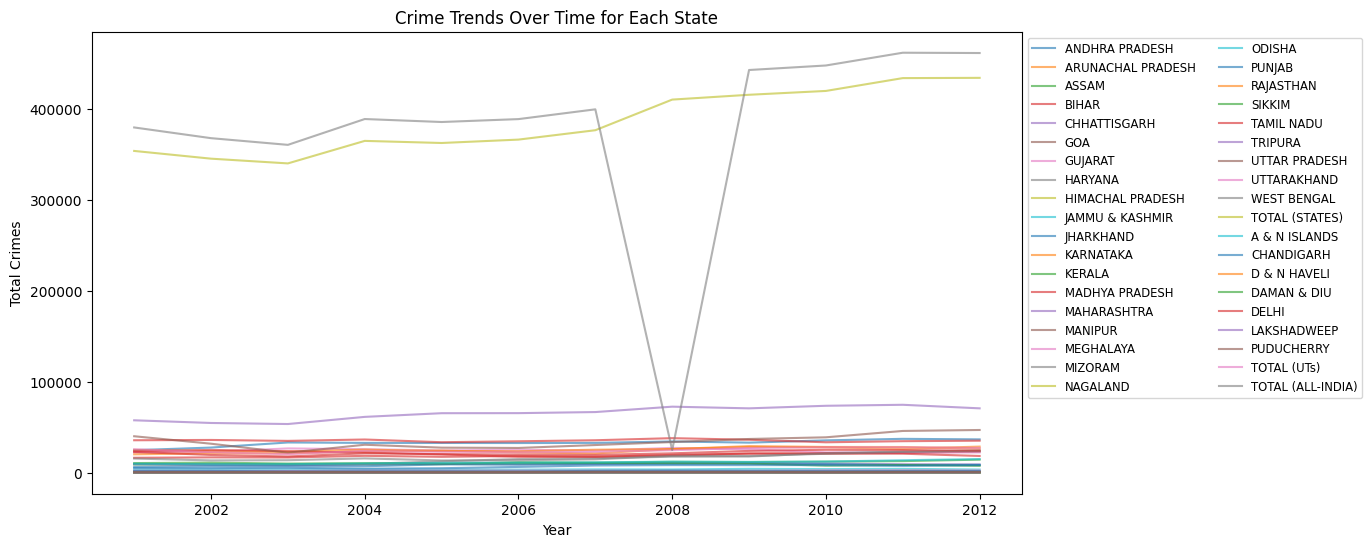

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Downloads/project/Crime_question 13.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Compute total crimes per state per year
df["total_crimes"] = df[["total_-_dacoity", "total_-_robbery", "total_-_burglary", "total_-_theft"]].sum(axis=1)

# Calculate percentage change in total crimes per state
df["crime_rate_change"] = df.groupby("state/ut")["total_crimes"].pct_change() * 100

# Identify states with the highest increase and decrease
crime_trend = df.groupby("state/ut")["crime_rate_change"].mean().sort_values()

# Select top 5 increasing and decreasing states
top_decreasing = crime_trend.head(5)
top_increasing = crime_trend.tail(5)

# Visualization - Bar Chart for Increase/Decrease in Crime Rate
plt.figure(figsize=(12, 6))
plt.barh(top_decreasing.index, top_decreasing.values, color="red", label="Decrease")
plt.barh(top_increasing.index, top_increasing.values, color="green", label="Increase")
plt.xlabel("Average Percentage Change in Crime Rate")
plt.ylabel("State/UT")
plt.title("Top 5 States with Significant Increase/Decrease in Crime Rate")
plt.legend()
plt.show()

# Visualization - Line Plot of Crime Trends Over Time
plt.figure(figsize=(12, 6))

# Plot crime trends for each state
for state in df["state/ut"].unique():
    state_data = df[df["state/ut"] == state]
    plt.plot(state_data["year"], state_data["total_crimes"], label=state, alpha=0.6)

plt.xlabel("Year")
plt.ylabel("Total Crimes")
plt.title("Crime Trends Over Time for Each State")
plt.legend(fontsize="small", ncol=2, loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


In [ ]:
#14 Crime Distribution by State: Compute and visualize the percentage share of each type of crime for all states to understand the distribution of criminal activities.

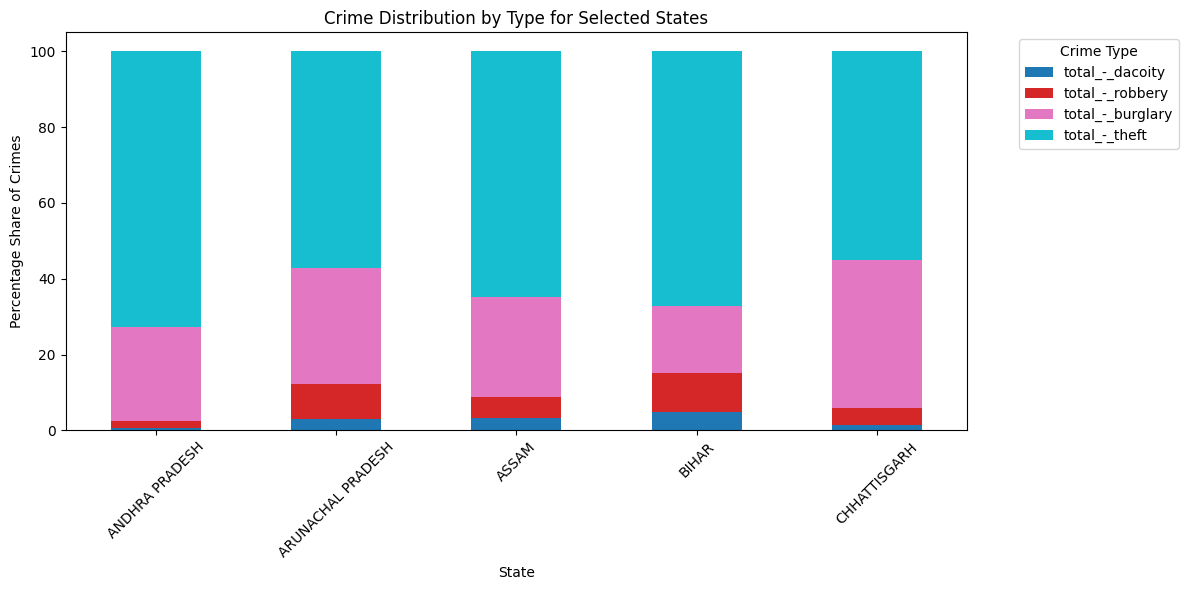

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Downloads/project/Crime_question 13.csv"
df = pd.read_csv(file_path)

# Selecting relevant columns
crime_columns = [col for col in df.columns if 'total' in col]
states = df['state/ut'].unique()

# Compute percentage share of each crime type per state
crime_percentages = df.groupby('state/ut')[crime_columns].sum()
crime_percentages = crime_percentages.div(crime_percentages.sum(axis=1), axis=0) * 100

# Plot the distribution for a few selected states
plt.figure(figsize=(12, 6))
selected_states = states[:5]  # Visualizing the first five states
crime_percentages.loc[selected_states].plot(kind='bar', stacked=True, colormap='tab10', ax=plt.gca())

plt.title('Crime Distribution by Type for Selected States')
plt.xlabel('State')
plt.ylabel('Percentage Share of Crimes')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
